In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import deque
from surprise import Dataset, NormalPredictor, Reader
from surprise.model_selection import cross_validate

In [2]:
#!pwd

/Users/alecclarkfeather/capstone_project


In [7]:
movie_titles = pd.read_csv('movie_titles.csv', header=None, encoding='ISO-8859-1', 
                          names=['movie_id', 'year', 'title', 'description1', 'description2',
                                'description3'])
#movie_titles.head()

,movie_id,year,title,description1,description2,description3
0,1,2003.0,Dinosaur Planet,NaN,NaN,NaN
1,2,2004.0,Isle of Man TT 2004 Review,NaN,NaN,NaN
2,3,1997.0,Character,NaN,NaN,NaN
3,4,1994.0,Paula Abdul's Get Up & Dance,NaN,NaN,NaN
4,5,2004.0,The Rise and Fall of ECW,NaN,NaN,NaN


In [8]:
#movie_titles.shape

(17770, 6)

In [9]:
#movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      17770 non-null  int64  
 1   year          17763 non-null  float64
 2   title         17770 non-null  object 
 3   description1  336 non-null    object 
 4   description2  34 non-null     object 
 5   description3  9 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 833.1+ KB


In [10]:
movie_titles = movie_titles.drop(columns=['description1', 'description2', 'description3'], axis=1)
#movie_titles.head()

,movie_id,year,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [11]:
#movie_titles[movie_titles['year'].isnull()]

,movie_id,year,title
4387,4388,NaN,Ancient Civilizations: Rome and Pompeii
4793,4794,NaN,Ancient Civilizations: Land of the Pharaohs
7240,7241,NaN,Ancient Civilizations: Athens and Greece
10781,10782,NaN,Roti Kapada Aur Makaan
15917,15918,NaN,Hote Hote Pyaar Ho Gaya
16677,16678,NaN,Jimmy Hollywood
17666,17667,NaN,Eros Dance Dhamaka


In [12]:
#ratings1 = pd.read_csv('combined_data_1.txt', header=None,
                      #names=['user_id', 'rating', 'date'])
#ratings1.head()

,user_id,rating,date
0,1:,NaN,NaN
1,1488844,3.0,2005-09-06
2,822109,5.0,2005-05-13
3,885013,4.0,2005-10-19
4,30878,4.0,2005-12-26


In [13]:
#ratings1.shape

(24058263, 3)

In [14]:
#ratings1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  object 
 1   rating   float64
 2   date     object 
dtypes: float64(1), object(2)
memory usage: 550.7+ MB


In [15]:
#ratings1.isnull().sum()

user_id       0
rating     4499
date       4499
dtype: int64

In [16]:
#tmp_ids = ratings1[ratings1['rating'].isnull()]['user_id'].reset_index()
#tmp_ids.head(10)

,index,user_id
0,0,1:
1,548,2:
2,694,3:
3,2707,4:
4,2850,5:
5,3991,6:
6,5011,7:
7,5105,8:
8,20016,9:
9,20112,10:


In [17]:
#tmp_ids.tail(10)

,index,user_id
4489,24020134,4490:
4490,24030393,4491:
4491,24030847,4492:
4492,24040201,4493:
4493,24046583,4494:
4494,24046714,4495:
4495,24047329,4496:
4496,24056849,4497:
4497,24057564,4498:
4498,24057834,4499:


In [18]:
#tmp_ids['movie_id'] = tmp_ids['user_id'].str.replace(':', '')
#tmp_ids.head(10)

,index,user_id,movie_id
0,0,1:,1
1,548,2:,2
2,694,3:,3
3,2707,4:,4
4,2850,5:,5
5,3991,6:,6
6,5011,7:,7
7,5105,8:,8
8,20016,9:,9
9,20112,10:,10


In [19]:
#tmp_ids.tail(10)

,index,user_id,movie_id
4489,24020134,4490:,4490
4490,24030393,4491:,4491
4491,24030847,4492:,4492
4492,24040201,4493:,4493
4493,24046583,4494:,4494
4494,24046714,4495:,4495
4495,24047329,4496:,4496
4496,24056849,4497:,4497
4497,24057564,4498:,4498
4498,24057834,4499:,4499


In [20]:
#tmp_ids = tmp_ids.drop('user_id', axis=1)
#tmp_ids.head()

,index,movie_id
0,0,1
1,548,2
2,694,3
3,2707,4
4,2850,5


In [22]:
#movie_id_indices = [[index, int(movie_id)] for index, movie_id in tmp_ids.values]
#movie_id_indices[:10]

[[0, 1],
 [548, 2],
 [694, 3],
 [2707, 4],
 [2850, 5],
 [3991, 6],
 [5011, 7],
 [5105, 8],
 [20016, 9],
 [20112, 10]]

In [29]:
#from collections import deque

#shifted_indices = deque(movie_id_indices)
#shifted_indices

In [30]:
#shifted_indices.rotate(-1)
#shifted_indices

deque([[548, 2],
       [694, 3],
       [2707, 4],
       [2850, 5],
       [3991, 6],
       [5011, 7],
       [5105, 8],
       [20016, 9],
       [20112, 10],
       [20362, 11],
       [20561, 12],
       [21108, 13],
       [21234, 14],
       [21353, 15],
       [21644, 16],
       [24344, 17],
       [31453, 18],
       [42176, 19],
       [42716, 20],
       [42833, 21],
       [43052, 22],
       [43256, 23],
       [43872, 24],
       [45206, 25],
       [46414, 26],
       [52276, 27],
       [52550, 28],
       [92303, 29],
       [92827, 30],
       [211241, 31],
       [211463, 32],
       [213318, 33],
       [220209, 34],
       [220318, 35],
       [221158, 36],
       [222098, 37],
       [222380, 38],
       [223183, 39],
       [223936, 40],
       [224428, 41],
       [224522, 42],
       [224651, 43],
       [224757, 44],
       [233259, 45],
       [235879, 46],
       [242438, 47],
       [244789, 48],
       [248381, 49],
       [248613, 50],
       [248942, 5

In [31]:
#user_data = []

#for (index1, movie_id), (index2, next_movie_id) in zip(movie_id_indices, shifted_indices):
    #if index1 < index2:
        #temp_df = ratings1.loc[index1+1:index2-1].copy()
    #else:
        #temp_df = ratings1.loc[index1+1:].copy()
        
    #temp_df['movie_id'] = movie_id
    
    #user_data.append(temp_df)
    
#user_data[:5]

[     user_id  rating        date  movie_id
 1    1488844     3.0  2005-09-06         1
 2     822109     5.0  2005-05-13         1
 3     885013     4.0  2005-10-19         1
 4      30878     4.0  2005-12-26         1
 5     823519     3.0  2004-05-03         1
 ..       ...     ...         ...       ...
 543  1790158     4.0  2005-05-17         1
 544  1403184     3.0  2005-11-12         1
 545  1535440     4.0  2005-08-18         1
 546  1426604     4.0  2005-09-01         1
 547  1815755     5.0  2004-07-20         1
 
 [547 rows x 4 columns],
      user_id  rating        date  movie_id
 549  2059652     4.0  2005-09-05         2
 550  1666394     3.0  2005-04-19         2
 551  1759415     4.0  2005-04-22         2
 552  1959936     5.0  2005-11-21         2
 553   998862     4.0  2004-11-13         2
 ..       ...     ...         ...       ...
 689  1581265     3.0  2005-04-15         2
 690   515436     1.0  2005-02-13         2
 691  1824543     4.0  2005-04-20         2
 692 

In [32]:
#https://www.kaggle.com/code/kefahaied/netflix-movie-recommendation-kefah

In [34]:
#df_ratings1 = pd.concat(user_data)
#df_ratings1.head(10)

,user_id,rating,date,movie_id
1,1488844,3.0,2005-09-06,1
2,822109,5.0,2005-05-13,1
3,885013,4.0,2005-10-19,1
4,30878,4.0,2005-12-26,1
5,823519,3.0,2004-05-03,1
6,893988,3.0,2005-11-17,1
7,124105,4.0,2004-08-05,1
8,1248029,3.0,2004-04-22,1
9,1842128,4.0,2004-05-09,1
10,2238063,3.0,2005-05-11,1


In [35]:
#df_ratings1.shape

(24053764, 4)

In [36]:
#df_ratings1.isnull().sum()

user_id     0
rating      0
date        0
movie_id    0
dtype: int64

In [37]:
#df_ratings1.tail(10)

,user_id,rating,date,movie_id
24058253,272857,4.0,2005-06-22,4499
24058254,185372,1.0,2004-06-07,4499
24058255,2219917,3.0,2004-05-03,4499
24058256,1796454,1.0,2004-07-07,4499
24058257,2562830,4.0,2004-06-19,4499
24058258,2591364,2.0,2005-02-16,4499
24058259,1791000,2.0,2005-02-10,4499
24058260,512536,5.0,2005-07-27,4499
24058261,988963,3.0,2005-12-20,4499
24058262,1704416,3.0,2004-06-02,4499


In [38]:
#from surprise import Dataset, NormalPredictor, Reader
#from surprise.model_selection import cross_validate

In [39]:
#df_ratings1['rating'].describe()

count    2.405376e+07
mean     3.599634e+00
std      1.086118e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [40]:
#reader = Reader(rating_scale=(1,5))
#data = Dataset.load_from_df(df_ratings1[['user_id', 'movie_id', 'rating']], reader)
#data

In [42]:
#cross_validate(NormalPredictor(), data, cv=2)

In [43]:
#df_ratings1['user_id'].nunique()

470758

In [44]:
def load_ratings_df(file):
    ratings = pd.read_csv(file, header=None, names=['user_id', 'rating', 'date'])
    tmp_ids = ratings[ratings['rating'].isnull()]['user_id'].reset_index()
    tmp_ids['movie_id'] = tmp_ids['user_id'].str.replace(':', '')
    tmp_ids = tmp_ids.drop('user_id', axis=1)
    movie_id_indices = [[index, int(movie_id)] for index, movie_id in tmp_ids.values]
    shifted_indices = deque(movie_id_indices)
    shifted_indices.rotate(-1)
    
    user_data = []

    for (index1, movie_id), (index2, next_movie_id) in zip(movie_id_indices, shifted_indices):
        if index1 < index2:
            temp_df = ratings.loc[index1+1:index2-1].copy()
        else:
            temp_df = ratings.loc[index1+1:].copy()
        
        temp_df['movie_id'] = movie_id
    
        user_data.append(temp_df)
        
    df_ratings = pd.concat(user_data)
    
    return df_ratings
    

In [45]:
#del reader, data, user_data, shifted_indices, movie_id_indices, tmp_ids, ratings1

In [46]:
#df_ratings1.head(10)

,user_id,rating,date,movie_id
1,1488844,3.0,2005-09-06,1
2,822109,5.0,2005-05-13,1
3,885013,4.0,2005-10-19,1
4,30878,4.0,2005-12-26,1
5,823519,3.0,2004-05-03,1
6,893988,3.0,2005-11-17,1
7,124105,4.0,2004-08-05,1
8,1248029,3.0,2004-04-22,1
9,1842128,4.0,2004-05-09,1
10,2238063,3.0,2005-05-11,1


In [47]:
df_ratings1 = load_ratings_df('combined_data_1.txt')
df_ratings2 = load_ratings_df('combined_data_2.txt')
df_ratings3 = load_ratings_df('combined_data_3.txt')
df_ratings4 = load_ratings_df('combined_data_4.txt')

In [49]:
#df_ratings2.tail(10)

,user_id,rating,date,movie_id
26982292,2643057,3.0,2005-01-06,9210
26982293,262367,3.0,2003-05-29,9210
26982294,1921572,2.0,2002-09-22,9210
26982295,2570936,4.0,2002-12-20,9210
26982296,501054,3.0,2003-06-03,9210
26982297,2420260,1.0,2003-12-01,9210
26982298,761176,3.0,2004-06-06,9210
26982299,459277,3.0,2005-02-25,9210
26982300,2407365,4.0,2005-04-29,9210
26982301,627867,3.0,2005-05-02,9210


In [51]:
#df_ratings3.tail(10)

,user_id,rating,date,movie_id
22605776,1639792,1.0,2002-10-15,13367
22605777,1515355,4.0,2003-03-07,13367
22605778,1565041,3.0,2004-01-04,13367
22605779,151344,3.0,2004-01-26,13367
22605780,2460347,1.0,2005-12-19,13367
22605781,2339129,4.0,2002-10-07,13367
22605782,59005,4.0,2005-01-21,13367
22605783,1789683,5.0,2005-05-25,13367
22605784,1878798,1.0,2003-02-17,13367
22605785,2634967,1.0,2005-01-10,13367


In [54]:
#df_ratings4.head(10)

,user_id,rating,date,movie_id
1,2385003,4.0,2004-07-08,13368
2,659432,3.0,2005-03-16,13368
3,751812,2.0,2002-12-16,13368
4,2625420,2.0,2004-05-25,13368
5,1650301,1.0,2005-08-30,13368
6,2269227,4.0,2005-10-27,13368
7,2220672,4.0,2002-08-19,13368
8,2500511,4.0,2003-08-11,13368
9,1452058,2.0,2005-01-29,13368
10,1624891,3.0,2002-07-27,13368


In [55]:
#print(len(df_ratings1))
#print(len(df_ratings2))
#print(len(df_ratings3))
#print(len(df_ratings4))

24053764
26977591
22601629
26847523


In [56]:
full_df = pd.concat([df_ratings1, df_ratings2, df_ratings3, df_ratings4], axis=0, ignore_index=True)
#full_df.shape

(100480507, 4)

In [57]:
#full_df.head(10)

,user_id,rating,date,movie_id
0,1488844,3.0,2005-09-06,1
1,822109,5.0,2005-05-13,1
2,885013,4.0,2005-10-19,1
3,30878,4.0,2005-12-26,1
4,823519,3.0,2004-05-03,1
5,893988,3.0,2005-11-17,1
6,124105,4.0,2004-08-05,1
7,1248029,3.0,2004-04-22,1
8,1842128,4.0,2004-05-09,1
9,2238063,3.0,2005-05-11,1


In [58]:
#full_df.tail(10)

,user_id,rating,date,movie_id
100480497,834323,2.0,2005-10-04,17770
100480498,516110,5.0,2004-08-26,17770
100480499,365996,3.0,2003-11-10,17770
100480500,986348,4.0,2004-08-12,17770
100480501,311124,3.0,2005-09-29,17770
100480502,1790158,4.0,2005-11-01,17770
100480503,1608708,3.0,2005-07-19,17770
100480504,234275,1.0,2004-08-07,17770
100480505,255278,4.0,2004-05-28,17770
100480506,453585,2.0,2005-03-10,17770


In [59]:
full_df['user_id'].nunique()

480189

In [60]:
full_df.isnull().sum()

user_id     0
rating      0
date        0
movie_id    0
dtype: int64

In [61]:
full_df['rating'].describe()

count    1.004805e+08
mean     3.604290e+00
std      1.085219e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [62]:
ratings_per_user = full_df.groupby('user_id')['rating'].count()

In [67]:
ratings_per_user.describe()

count    480189.000000
mean        209.251997
std         302.339155
min           1.000000
25%          39.000000
50%          96.000000
75%         259.000000
max       17653.000000
Name: rating, dtype: float64

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


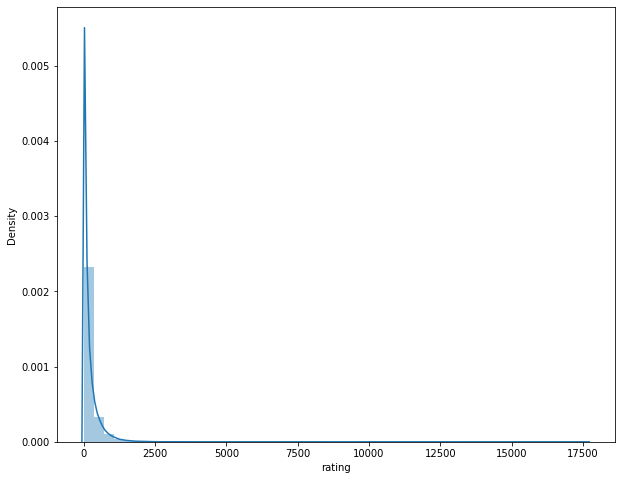

In [70]:
#plt.figure(figsize=(10,8))
#sns.distplot(ratings_per_user)
#plt.show()

In [71]:
#q1 = np.quantile(ratings_per_user, 0.25)
#q3 = np.quantile(ratings_per_user, 0.75)
#print(q1, q3)

39.0 259.0


In [72]:
#iqr = q3 - q1
#upper_bound = q3 + (1.5 * iqr)
#print(upper_bound)

589.0


In [73]:
#num_ratings_sd = ratings_per_user.std()
#print(num_ratings_sd)

302.33915548694733


In [78]:
rating_count_mask_lower = ratings_per_user >= 30 
rating_count_mask_upper = ratings_per_user <= 300

In [81]:
user_ids_clipped = ratings_per_user[rating_count_mask_lower & rating_count_mask_upper]
#user_ids_clipped

user_id
10         260
1000004     32
1000027     99
1000035     83
1000051     35
          ... 
999964     227
999972     165
999977      57
999984     185
999988     107
Name: rating, Length: 287566, dtype: int64

In [84]:
users_to_keep = list(user_ids_clipped.index)

In [86]:
#full_df.dtypes

user_id      object
rating      float64
date         object
movie_id      int64
dtype: object

In [87]:
full_df_clipped = full_df[full_df['user_id'].isin(users_to_keep)]
#full_df_clipped.head(10)

,user_id,rating,date,movie_id
1,822109,5.0,2005-05-13,1
6,124105,4.0,2004-08-05,1
8,1842128,4.0,2004-05-09,1
9,2238063,3.0,2005-05-11,1
10,1503895,4.0,2005-05-19,1
16,804919,4.0,2004-06-10,1
17,1086807,3.0,2004-12-28,1
27,814701,5.0,2005-09-29,1
29,662870,5.0,2005-08-24,1
35,2381599,3.0,2005-09-12,1


In [88]:
#full_df_clipped.shape

(32809776, 4)

In [89]:
full_df_clipped['user_id'] = full_df_clipped['user_id'].astype(int)
#full_df_clipped.dtypes

<ipython-input-89-5f8f54b00bcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df_clipped['user_id'] = full_df_clipped['user_id'].astype(int)


user_id       int64
rating      float64
date         object
movie_id      int64
dtype: object

In [90]:
movie_count = full_df_clipped.groupby('movie_id')['rating'].count()

In [91]:
movie_count.describe()

count     17769.000000
mean       1846.461590
std        7337.278078
min           1.000000
25%          60.000000
50%         156.000000
75%         606.000000
max      140465.000000
Name: rating, dtype: float64

In [95]:
#np.quantile(movie_count, 0.02)

18.0

In [96]:
movie_count_mask = movie_count >= 30
movies_clipped = movie_count[movie_count_mask]
movies_to_keep = list(movies_clipped.index)

In [97]:
full_df_clipped2 = full_df_clipped[full_df_clipped['movie_id'].isin(movies_to_keep)]
#full_df_clipped2.head(10)

,user_id,rating,date,movie_id
1,822109,5.0,2005-05-13,1
6,124105,4.0,2004-08-05,1
8,1842128,4.0,2004-05-09,1
9,2238063,3.0,2005-05-11,1
10,1503895,4.0,2005-05-19,1
16,804919,4.0,2004-06-10,1
17,1086807,3.0,2004-12-28,1
27,814701,5.0,2005-09-29,1
29,662870,5.0,2005-08-24,1
35,2381599,3.0,2005-09-12,1


In [98]:
#full_df_clipped2.shape

(32780045, 4)

In [100]:
full_df_clipped2['date'] = pd.to_datetime(full_df_clipped2['date'])

<ipython-input-100-26083dfafd5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df_clipped2['date'] = pd.to_datetime(full_df_clipped2['date'])


In [102]:
#full_df_clipped2['date'].max()

Timestamp('2005-12-31 00:00:00')

In [108]:
#len(full_df_clipped2[full_df_clipped2['date']<='2003-01-01'])

1399190

In [109]:
full_df_clipped3 = full_df_clipped2[full_df_clipped2['date']>='2003-01-01']
#full_df_clipped3.head(10)

,user_id,rating,date,movie_id
1,822109,5.0,2005-05-13,1
6,124105,4.0,2004-08-05,1
8,1842128,4.0,2004-05-09,1
9,2238063,3.0,2005-05-11,1
10,1503895,4.0,2005-05-19,1
16,804919,4.0,2004-06-10,1
17,1086807,3.0,2004-12-28,1
27,814701,5.0,2005-09-29,1
29,662870,5.0,2005-08-24,1
35,2381599,3.0,2005-09-12,1


In [110]:
#full_df_clipped3.shape

(31384254, 4)

In [115]:
df_sample = full_df_clipped3.sample(n=5000000)
#df_sample.head(10)

In [116]:
sample_user_count = df_sample.groupby('user_id')['rating'].count()
sample_movie_count = df_sample.groupby('movie_id')['rating'].count()

In [117]:
sample_user_count.describe()

count    285597.000000
mean         17.507187
std          12.073391
min           1.000000
25%           8.000000
50%          14.000000
75%          25.000000
max          71.000000
Name: rating, dtype: float64

In [118]:
sample_movie_count.describe()

count    16369.000000
mean       305.455434
std       1171.861406
min          1.000000
25%         11.000000
50%         29.000000
75%        105.000000
max      21020.000000
Name: rating, dtype: float64

In [119]:
user_lower_bound_mask = sample_user_count >= 5
movie_lower_bound_mask = sample_movie_count >= 5

sample_users_to_keep = sample_user_count[user_lower_bound_mask]
sample_movies_to_keep = sample_movie_count[movie_lower_bound_mask]

users_to_keep2 = list(sample_users_to_keep.index)
movies_to_keep2 = list(sample_movies_to_keep.index)

df_sample_clipped = df_sample[(df_sample['user_id'].isin(users_to_keep2)) & 
                              (df_sample['movie_id'].isin(movies_to_keep2))]

#df_sample_clipped.head(10)

,user_id,rating,date,movie_id
36420325,841872,3.0,2003-03-21,6464
42791681,689085,2.0,2004-05-19,7590
64859971,2529854,4.0,2005-10-22,11837
59155484,2597445,4.0,2005-01-25,10886
30218564,2336656,3.0,2005-07-01,5522
15547239,164323,3.0,2004-04-22,3004
52525666,29684,5.0,2004-10-18,9569
69141671,1127992,1.0,2003-10-11,12517
34492802,2403350,4.0,2004-11-17,6206
42373263,197989,2.0,2005-06-11,7511


In [120]:
df_sample_clipped.shape

(4930503, 4)

In [121]:
df_sample_clipped['user_id'].nunique()

264059

In [122]:
df_sample_clipped['movie_id'].nunique()

15639

In [123]:
#reader = Reader(rating_scale=(1,5))
#data = Dataset.load_from_df(df_sample_clipped[['user_id', 'movie_id', 'rating']], reader)
#data

In [124]:
#cross_validate(NormalPredictor(), data, cv=2)

{'test_rmse': array([1.47781068, 1.47685172]),
 'test_mae': array([1.18039143, 1.17963758]),
 'fit_time': (7.305910110473633, 6.497300863265991),
 'test_time': (436.06521701812744, 32.9238920211792)}

In [125]:
#!pwd

/Users/alecclarkfeather/capstone_project


In [126]:
#df_sample_clipped.to_csv('netflix_sample.csv')